<a href="https://colab.research.google.com/github/prashantloni9164/AttendanceSystem/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install face_recognition

In [47]:
import face_recognition
import cv2
import numpy as np
import os
from datetime import datetime
from google.colab.patches import cv2_imshow

In [24]:
!git clone 'https://github.com/prashantloni9164/AttendanceSystem.git'

fatal: destination path 'AttendanceSystem' already exists and is not an empty directory.


In [31]:
path='/content/AttendanceSystem/ImageLibray'
Images=[]
PersonName=[]
Images_Encoded=[]

for img in os.listdir(path):
  ImgFullPath= os.path.join(path,img)
  ImgRead=face_recognition.load_image_file(ImgFullPath)
  ImgRead=cv2.cvtColor(ImgRead,cv2.COLOR_BGR2RGB)
  Images.append(ImgRead)
  ImgName=os.path.splitext(img)[0]
  PersonName.append(ImgName)
  ImgEncode=face_recognition.face_encodings(ImgRead)[0]
  Images_Encoded.append(ImgEncode)

In [26]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


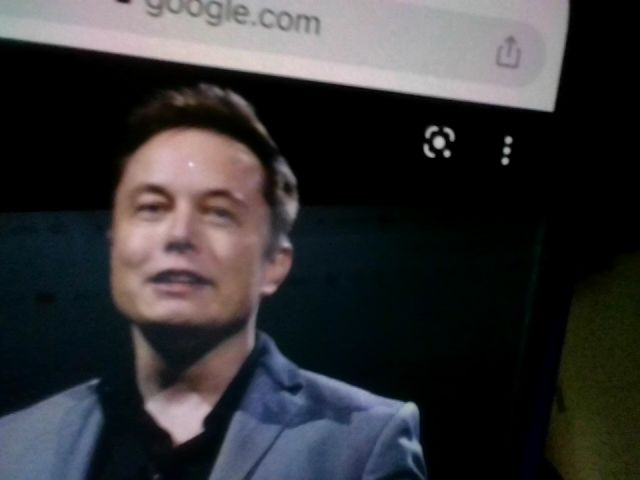

In [66]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

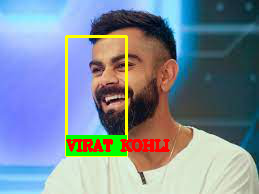

In [82]:
TestImg='/content/AttendanceSystem/ImageLibray/Virat Kohli.jfif'
TestImgRead=face_recognition.load_image_file(TestImg)
TestImgRead=cv2.cvtColor(TestImgRead,cv2.COLOR_BGR2RGB)
TestImgLoc=face_recognition.face_locations(TestImgRead)
TestImgEncode=face_recognition.face_encodings(TestImgRead,TestImgLoc)
for FaceEncode, FaceLoca in zip(TestImgEncode,TestImgLoc):
  matches=face_recognition.compare_faces(Images_Encoded,FaceEncode)
  FaceDis=face_recognition.face_distance(Images_Encoded,FaceEncode)
  match_index=np.argmin(FaceDis)
  if matches[match_index]:
    name=PersonName[match_index]
    cv2.rectangle(TestImgRead,(FaceLoca[3],FaceLoca[0]),(FaceLoca[2],FaceLoca[1]),(0,255,255),2)
    cv2.rectangle(TestImgRead,(FaceLoca[3],FaceLoca[1]-20),(FaceLoca[2],FaceLoca[1]),(0,255,0),cv2.FILLED)
    cv2_imshow(cv2.putText(TestImgRead,name.upper(),(FaceLoca[3],FaceLoca[1]-5),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255),2))
    with open('/content/AttendanceSystem/AttendanceSheet.csv', 'r+') as f:
      mydata=[]
      existed_data=f.readlines()
      for line in existed_data:
        NameInLine=line.split(',')[0]
        mydata.append(NameInLine)
      if name not in mydata:
        DateTime=datetime.now()
        date=DateTime.strftime('%d/%m/%y')
        time=DateTime.strftime('%H:%M:%S')
        f.writelines(f'\n{name},{date},{time}')


In [83]:
with open('/content/AttendanceSystem/AttendanceSheet.csv', 'r') as f:
  all_lines=f.read()
  print(all_lines)

Name,Date,Time

Elon Musk,19/02/22,07:49:26
Modi,19/02/22,07:56:01
Virat Kohli,19/02/22,07:56:45
